<a href="https://colab.research.google.com/github/Wahid-vinchenzo/Research-Farm/blob/main/Auditing_human_preference_in_ai_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data load and type line matrics**

In [4]:
# Step 1: Load CSV and compute topline metrics
import pandas as pd
import numpy as np

# adjust path to your CSV
df = pd.read_csv("https://raw.githubusercontent.com/Wahid-vinchenzo/Research-Farm/refs/heads/main/AGrimid/Data%20set%20Agrimid/dummy_ai_preference_dataset.csv")  # <-- change to your actual CSV path

# Columns referenced in earlier conversation:
# familiarity_ai, general_trust_ai, comfort_scheduling, comfort_grading_mcq,
# comfort_grading_essay, need_human_essay

metrics = {
    "Familiarity_with_AI": df["familiarity_ai"].mean(),
    "Trust_in_AI": df["general_trust_ai"].mean(),
    "Comfort_Scheduling": df["comfort_scheduling"].mean(),
    "Comfort_MCQ_Grading": df["comfort_grading_mcq"].mean(),
    "Comfort_Essay_Grading": df["comfort_grading_essay"].mean(),
    "Need_Human_in_Essay_Grading": df["need_human_essay"].mean()
}

metrics_df = pd.DataFrame.from_dict(metrics, orient="index", columns=["Mean"])
metrics_df.index.name = "Metric"
print(metrics_df.round(2))

# Save to CSV for slide paste
metrics_df.round(2).to_csv("topline_metrics.csv")


                             Mean
Metric                           
Familiarity_with_AI           3.5
Trust_in_AI                   3.3
Comfort_Scheduling            4.2
Comfort_MCQ_Grading           3.3
Comfort_Essay_Grading         2.3
Need_Human_in_Essay_Grading   4.5


**Task-category bar chart (Routine vs Sensitive vs Creative)**

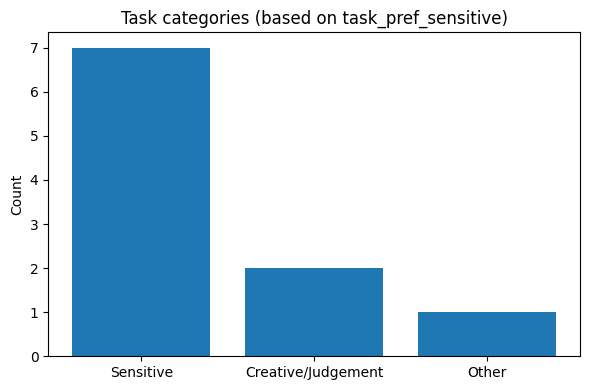

In [5]:
# Step 2: Task-category counts and bar chart
import matplotlib.pyplot as plt
from collections import Counter

# If you have a column that lists 'Task preferences' like `task_pref_sensitive`
# we will map common keywords to categories. Adjust mapping as needed.
task_col = "task_pref_sensitive"  # change if different column
tasks = df[task_col].fillna("").astype(str).tolist()

# simple keyword-based category mapping
def categorize_task(text):
    text = text.lower()
    if any(k in text for k in ["schedule","scheduling","email","transcription","data entry","inventory","note"]):
        return "Routine"
    if any(k in text for k in ["hiring","medical","legal","salary","final","evaluation"]):
        return "Sensitive"
    if any(k in text for k in ["essay","creative","writing","performance","emotional"]):
        return "Creative/Judgement"
    return "Other"

categories = [categorize_task(t) for t in tasks]
counts = Counter(categories)
cat_df = pd.DataFrame.from_dict(counts, orient="index", columns=["Count"]).sort_values("Count", ascending=False)

# plot
plt.figure(figsize=(6,4))
plt.bar(cat_df.index, cat_df["Count"])
plt.title("Task categories (based on task_pref_sensitive)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("task_category_bar.png", dpi=200)
plt.show()

# save counts to CSV for reference
cat_df.to_csv("task_category_counts.csv")


**Comfort vs Perceived Risk heatmap (matrix)**

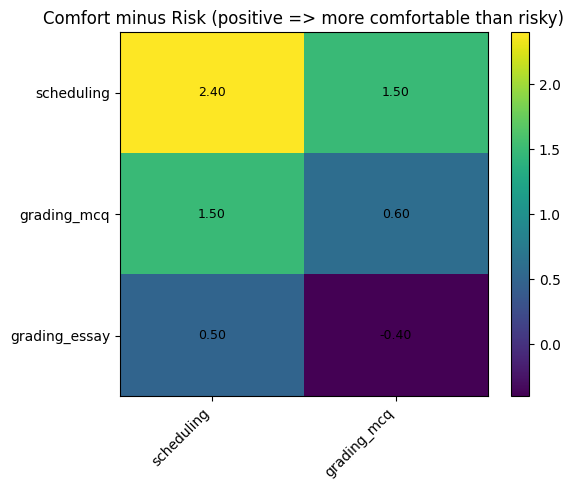

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the pairs of interest
comfort_cols = ["comfort_scheduling", "comfort_grading_mcq", "comfort_grading_essay"]
# Correcting risk_cols based on available DataFrame columns
risk_cols = ["risk_scheduling", "risk_grading_mcq"]

# compute means (rows: comfort, cols: risk)
matrix = np.zeros((len(comfort_cols), len(risk_cols)))
for i, c in enumerate(comfort_cols):
    for j, r in enumerate(risk_cols):
        # we can use correlation or simply mean of (comfort vs risk) to show relationship
        # here we'll show mean(comfort) - mean(risk) as an indicator (you can change metric)
        matrix[i, j] = df[c].mean() - df[r].mean()

# plot heatmap
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(matrix, aspect="auto")
# tick labels
ax.set_xticks(np.arange(len(risk_cols)))
ax.set_yticks(np.arange(len(comfort_cols)))
ax.set_xticklabels([col.replace('risk_', '') for col in risk_cols], rotation=45, ha="right") # Cleaned up tick labels
ax.set_yticklabels([col.replace('comfort_', '') for col in comfort_cols]) # Cleaned up tick labels
# Add text labels
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, f"{matrix[i,j]:.2f}", ha="center", va="center", fontsize=9)
ax.set_title("Comfort minus Risk (positive => more comfortable than risky)")
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.savefig("comfort_vs_risk_heatmap.png", dpi=200)
plt.show()

**Group-comparison (Students vs Teachers vs Office staff)**

              familiarity_ai  general_trust_ai  comfort_scheduling  \
role                                                                 
Office Staff            4.00               3.5                 4.5   
Student                 3.40               3.4                 4.2   
Teacher                 3.33               3.0                 4.0   

              comfort_grading_essay  
role                                 
Office Staff                    2.5  
Student                         2.4  
Teacher                         2.0  


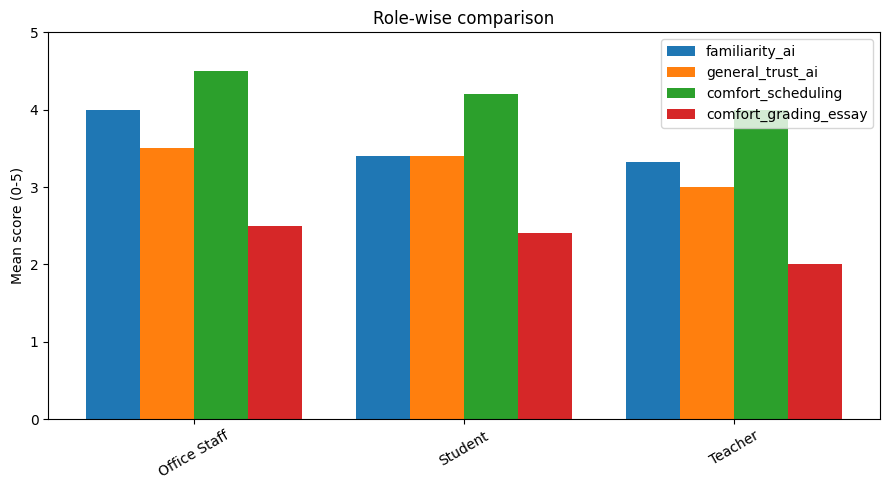

In [17]:
# Step 4: Group comparison (role-wise means)
import matplotlib.pyplot as plt
import numpy as np

group_col = "role"  # change if different
compare_cols = ["familiarity_ai", "general_trust_ai", "comfort_scheduling", "comfort_grading_essay"]

grouped = df.groupby(group_col)[compare_cols].mean().round(2)
print(grouped)

# plot grouped bars
roles = grouped.index.tolist()
x = np.arange(len(roles))
width = 0.2

fig, ax = plt.subplots(figsize=(9,5))
for i, col in enumerate(compare_cols):
    ax.bar(x + i*width, grouped[col], width=width, label=col)
ax.set_xticks(x + width*(len(compare_cols)-1)/2)
ax.set_xticklabels(roles, rotation=30)
ax.set_ylim(0,5)  # since ratings out of 5
ax.set_ylabel("Mean score (0-5)")
ax.set_title("Role-wise comparison")
ax.legend()
plt.tight_layout()
plt.savefig("group_comparison.png", dpi=200)
plt.show()

# Save aggregated numbers
grouped.to_csv("role_comparison_means.csv")


**Top concerns word cloud / frequency list**

Top concerns (tokens):
bias: 5
accuracy: 4
privacy: 4
loss: 2
accountability: 2
reliability: 2
fairness: 2
context: 2
over: 1
automation: 1
job: 1
misinterpretation: 1
safety: 1
data: 1
misuse: 1


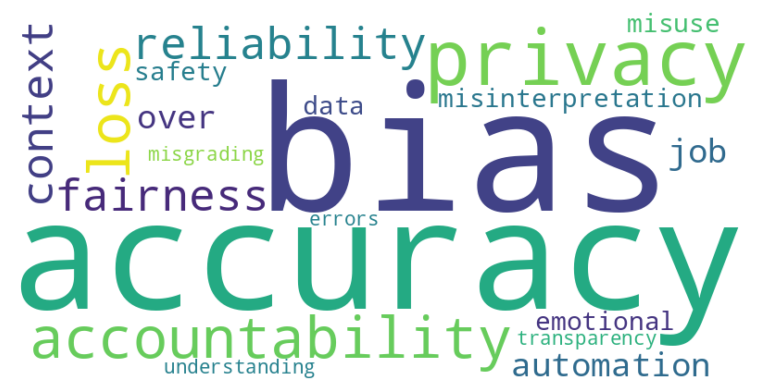

In [18]:
# Step 5: Concerns frequency + optional word cloud
from collections import Counter
import re

concerns_col = "concerns_top3"
all_text = " ".join(df[concerns_col].fillna("").astype(str).tolist()).lower()
# simple tokenization - keep words
tokens = re.findall(r"\b[a-zA-Z0-9_]+\b", all_text)
# remove common stopwords (english + a few extras)
stopwords = set(["and","or","the","of","to","in",";","/"])
tokens = [t for t in tokens if t not in stopwords]

freq = Counter(tokens)
most_common = freq.most_common(30)
print("Top concerns (tokens):")
for w,c in most_common[:15]:
    print(f"{w}: {c}")

# Optional: wordcloud (requires wordcloud package)
try:
    from wordcloud import WordCloud
    wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(freq)
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("concerns_wordcloud.png", dpi=200)
    plt.show()
except Exception as e:
    print("WordCloud unavailable or failed to generate:", e)

# Save frequencies
pd.DataFrame(most_common, columns=["token","count"]).to_csv("concern_token_freq.csv", index=False)


**Concrete task examples with recommended automation level**

In [22]:
# Step 6: Make recommendation table based on comfort and risk means
tasks = [
    {"task": "Scheduling meetings", "comfort_col": "comfort_scheduling", "risk_col": "risk_scheduling"},
    {"task": "MCQ grading", "comfort_col": "comfort_grading_mcq", "risk_col": "risk_grading_mcq"},
    {"task": "Essay grading", "comfort_col": "comfort_grading_essay", "risk_col": None}, # Changed risk_grading_essay to None as it doesn't exist
    {"task": "Hiring decisions", "comfort_col": None, "risk_col": None},  # use manual label
    {"task": "Medical suggestions", "comfort_col": None, "risk_col": None},
]

rows = []
for t in tasks:
    if t["comfort_col"] and t["risk_col"]:
        c = df[t["comfort_col"]].mean()
        r = df[t["risk_col"]].mean()
        # simple rules:
        if c >= 4 and r <= 2:
            rec = "Full-Auto"
        elif c >= 3 and r <= 3:
            rec = "Human-in-loop"
        else:
            rec = "Human-final-signoff"
    else:
        # for high-stakes tasks not in numeric columns
        rec = "Human-final-signoff"
        c, r = (np.nan, np.nan)
    rows.append({"Task": t["task"], "Comfort_mean": c, "Risk_mean": r, "Recommendation": rec})

rec_df = pd.DataFrame(rows)
print(rec_df)
rec_df.to_csv("task_recommendations.csv", index=False)

                  Task  Comfort_mean  Risk_mean       Recommendation
0  Scheduling meetings           4.2        1.8            Full-Auto
1          MCQ grading           3.3        2.7        Human-in-loop
2        Essay grading           NaN        NaN  Human-final-signoff
3     Hiring decisions           NaN        NaN  Human-final-signoff
4  Medical suggestions           NaN        NaN  Human-final-signoff


**One-page report (text) auto-generate**